In [2]:
from sklearn import datasets    
from sklearn.model_selection import train_test_split    
from sklearn.neighbors import KNeighborsClassifier   
import numpy as np    

In [3]:
iris = datasets.load_iris()    
X = iris.data    
y = iris.target    
print (X, y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)

In [5]:
clf = KNeighborsClassifier(n_neighbors=3)    
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
correct = np.count_nonzero((clf.predict(X_test)==y_test)==True)    
print ("Accuracy is: %.3f" %(correct/len(X_test)))

Accuracy is: 0.921


In [7]:
from sklearn import datasets
from collections import Counter  # 为了做投票
from sklearn.model_selection import train_test_split
import numpy as np

# 导入iris数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)


def euc_dis(instance1, instance2):
    """
    计算两个样本instance1和instance2之间的欧式距离
    instance1: 第一个样本， array型
    instance2: 第二个样本， array型
    """
    # TODO
    dist = np.sqrt(np.sum((instance1-instance2)**2))
    return dist
    
    
def knn_classify(X, y, testInstance, k):
    """
    给定一个测试数据testInstance, 通过KNN算法来预测它的标签。 
    X: 训练数据的特征
    y: 训练数据的标签
    testInstance: 测试数据，这里假定一个测试数据 array型
    k: 选择多少个neighbors? 
    """
    # TODO  返回testInstance的预测标签 = {0,1,2}

    # 计算 testInstance 与 X的距离
    dists=[euc_dis(x,testInstance) for x in X]
   
    # 找出最近的K个元素的idx
    idxknn= np.argsort(dists)[:k] #将dists从小到大排序，返回排序后的元素indices

    # 找出KNN对应的n个y值
    yknn=y[idxknn]

    # 返回投票结果
    return Counter(yknn).most_common(1)[0][0]


# 预测结果。    
predictions = [knn_classify(X_train, y_train, data, 3) for data in X_test]
correct = np.count_nonzero((predictions==y_test)==True)
print ("Accuracy is: %.3f" %(correct/len(X_test)))

Accuracy is: 0.921


(200, 2) (200,)


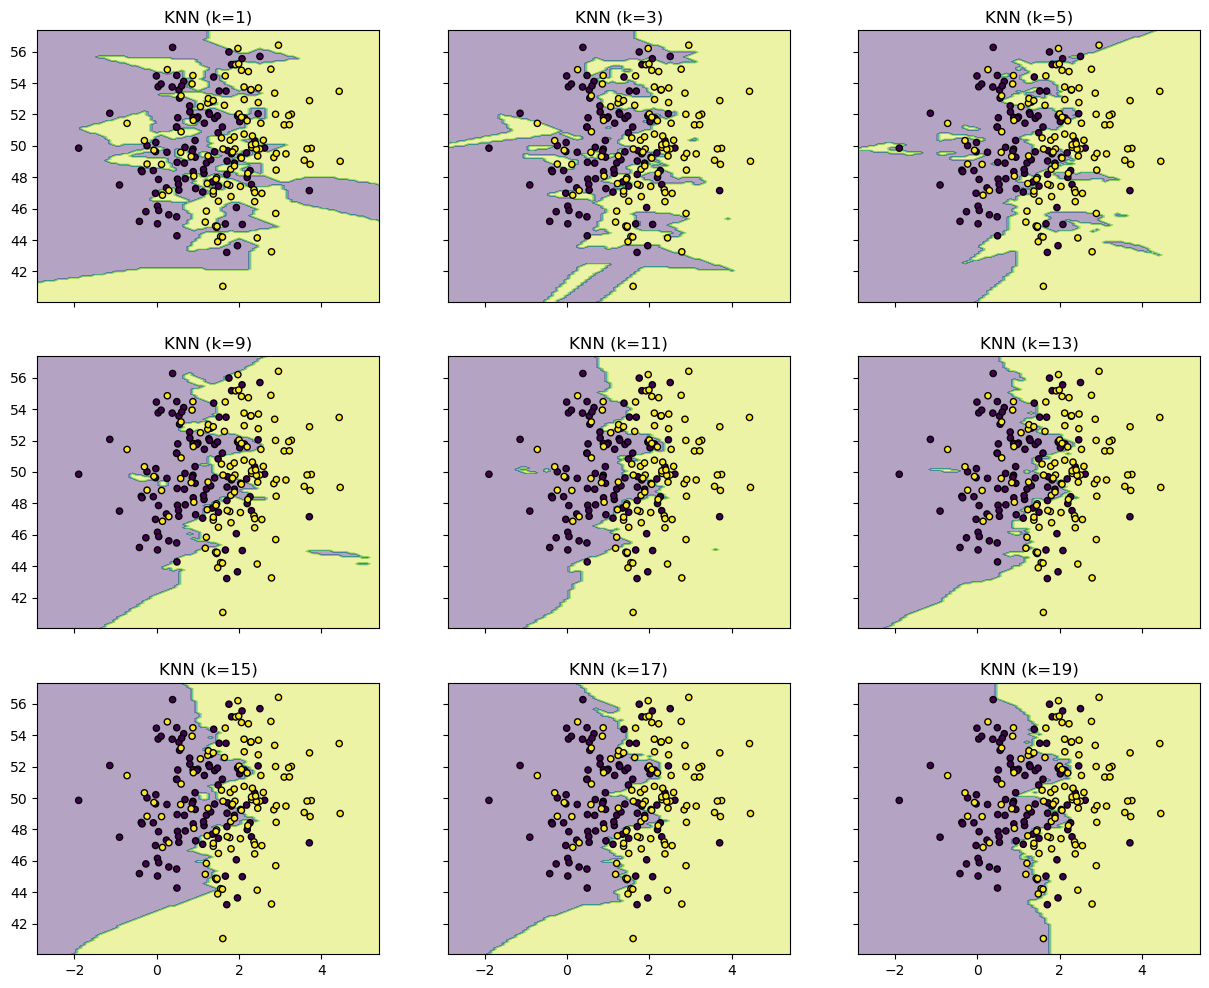

In [8]:
import matplotlib.pyplot as plt    
import numpy as np    
from itertools import product    
from sklearn.neighbors import KNeighborsClassifier 
#在这里我们随机生成了样本。其中一半的数据来源于第一个高斯分布，另一半的数据来自于第二个高斯分布。
# 生成一些随机样本    
n_points = 100    
X1 = np.random.multivariate_normal([1,50], [[1,0],[0,10]], n_points)    
X2 = np.random.multivariate_normal([2,50], [[1,0],[0,10]], n_points)    
X = np.concatenate([X1,X2])    
y = np.array([0]*n_points + [1]*n_points)    
print (X.shape, y.shape)    
#训练多个KNN模型，不同的KNN模型的参数K选择不一样。这里我们训练了9个不同的KNN模型。
# KNN模型的训练过程    
clfs = []    
neighbors = [1,3,5,9,11,13,15,17,19]    
for i in range(len(neighbors)):    
    clfs.append(KNeighborsClassifier(n_neighbors=neighbors[i]).fit(X,y))     
#下面这部分的主要代码是用来展示结果。
# 可视化结果    
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1    
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1    
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), 
                     np.arange(y_min, y_max, 0.1)) 
f, axarr = plt.subplots(3,3, sharex='col', sharey='row', figsize=(15, 12))   
for idx, clf, tt in zip(product([0, 1, 2], [0, 1, 2]), clfs,['KNN (k=%d)'%k for k in neighbors]):   
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)    
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k') 
    axarr[idx[0], idx[1]].set_title(tt)    
plt.show()    

In [24]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold  #  主要用于K折交叉验证

# 以下是导入iris数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target
print (X.shape, y.shape)

# 定义我们想要搜索的K值（候选集）,这里定义8不同的值
ks = [1,3,5,7,9,11,13,15]

# 进行5折交叉验证， KFold返回的是每一折中训练数据和验证数据的index
# 假设数据样本为： [1,3,5,6,11,12,43,12,44,2], 总共10个样本
# 则返回的kf的格式为(前面的是训练数据，后面的是验证集）：
# [0,1,3,5,6,7,8,9], [2,4]
# [0,1,2,4,6,7,8,9], [3,5]
# [1,2,3,4,5,6,7,8], [0,9]
# [0,1,2,3,4,5,7,9], [6,8]
# [0,2,3,4,5,6,8,9], [1,7]
kf = KFold(n_splits = 5, random_state=2001, shuffle=True)

# 保存当前最好的K值和对应的准确率值
best_k = ks[0]
best_score = 0

# 循环每一个K值

for k in ks:
    curr_score = 0
    for train_index, valid_index in kf.split(X):    
        # 每一折的训练以及计算准确率
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X[train_index], y[train_index])
        curr_score = curr_score + clf.score(X[valid_index], y[valid_index])
    # 求一下5折的平均准确率
    avg_score = curr_score/5 
    if avg_score > best_score:
        best_k = k
        best_score = avg_score
    print ("current best score is: %.2f"%best_score, "best k: %d"%best_k)
print ("after cross validation, the final best k is: %d"%best_k)


#使用sklearn内置函数实现K折交叉验证
from sklearn.model_selection import GridSearchCV # 通过网格方式来搜索参数
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# 导入iris是数据
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 设置需要搜索的K值， 'n_neighbors'是sklearn中KNN的参数
parameters = {'n_neighbors':[1,3,5,7,9,11,13,15]}
knn = KNeighborsClassifier()  # 注意：在这里不用指定参数

# 通过GridSearchCV来搜索最好的K值。 这个模块的内部其实
# 就是对于每一个K值做了评估
clf = GridSearchCV(knn, parameters, cv=5)   
clf.fit(X, y)

# 输出最好的参数以及对应的准确率
print ("best score is: %.2f"%clf.best_score_, "  best param: ",clf.best_params_)

(150, 4) (150,)
current best score is: 0.96 best k: 1
current best score is: 0.96 best k: 1
current best score is: 0.97 best k: 5
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
after cross validation, the final best k is: 7
best score is: 0.98   best param:  {'n_neighbors': 7}


(150, 4) (150,)
current best score is: 0.96 best k: 1
current best score is: 0.96 best k: 1
current best score is: 0.97 best k: 5
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
current best score is: 0.98 best k: 7
after cross validation, the final 

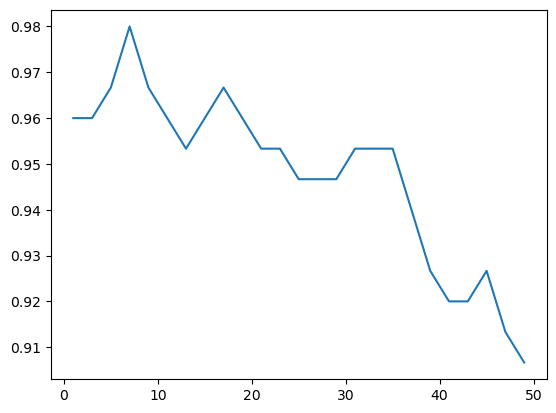

In [37]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold  #  主要用于K折交叉验证

# 以下是导入iris数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target
print (X.shape, y.shape)

# 定义我们想要搜索的K值（候选集）,这里定义8不同的值
ks = [1,3,5,7,9,11,13,15]

# 进行5折交叉验证， KFold返回的是每一折中训练数据和验证数据的index
# 假设数据样本为： [1,3,5,6,11,12,43,12,44,2], 总共10个样本
# 则返回的kf的格式为(前面的是训练数据，后面的是验证集）：
# [0,1,3,5,6,7,8,9], [2,4]
# [0,1,2,4,6,7,8,9], [3,5]
# [1,2,3,4,5,6,7,8], [0,9]
# [0,1,2,3,4,5,7,9], [6,8]
# [0,2,3,4,5,6,8,9], [1,7]
kf = KFold(n_splits = 5, random_state=2001, shuffle=True)

# 保存当前最好的K值和对应的准确率值
best_k = ks[0]
best_score = 0

# 循环每一个K值
score_y=[]
score_x=[]
for k in range(1,50,2):
    curr_score = 0
    score_x.append(k)
    for train_index, valid_index in kf.split(X):    
        # 每一折的训练以及计算准确率
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X[train_index], y[train_index])
        curr_score = curr_score + clf.score(X[valid_index], y[valid_index])
    # 求一下5折的平均准确率
    avg_score = curr_score/5 
    score_y.append(avg_score)
    if avg_score > best_score:
        best_k = k
        best_score = avg_score
    print ("current best score is: %.2f"%best_score, "best k: %d"%best_k)
print ("after cross validation, the final best k is: %d"%best_k)

plt.plot(score_x,score_y)
plt.show()

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
